# Data Preparation

In [ ]:
##Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/DATAQUEST_THECREW/YES_FIXDATACREW .csv'
load_data_res=pd.read_csv(path)

In [ ]:
df=pd.DataFrame(load_data_res)
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2016-01-01,DKI1 (Bunderan HI),59,19,27,31,1,59.0,PM10,SEDANG
1,2016-01-02,DKI1 (Bunderan HI),52,19,---,33,2,52.0,PM10,SEDANG
2,2016-01-03,DKI1 (Bunderan HI),44,19,---,36,2,44.0,PM10,BAIK
3,2016-01-04,DKI1 (Bunderan HI),58,21,---,46,5,58.0,PM10,SEDANG
4,2016-01-05,DKI1 (Bunderan HI),70,19,---,41,4,70.0,PM10,SEDANG


In [ ]:
df.nunique()

tanggal     2219
stasiun       55
pm10         111
so2          107
co           141
o3           221
no2          143
max          220
critical       6
categori       5
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10941 entries, 0 to 10940
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   10941 non-null  object 
 1   stasiun   10941 non-null  object 
 2   pm10      10893 non-null  object 
 3   so2       10880 non-null  object 
 4   co        10868 non-null  object 
 5   o3        10849 non-null  object 
 6   no2       10846 non-null  object 
 7   max       10912 non-null  float64
 8   critical  10791 non-null  object 
 9   categori  10941 non-null  object 
dtypes: float64(1), object(9)
memory usage: 854.9+ KB


In [ ]:
df.isna().sum()

tanggal       0
stasiun       0
pm10         48
so2          61
co           73
o3           92
no2          95
max          29
critical    150
categori      0
dtype: int64

# Data Preprocessing

In [ ]:
df['so2']= df['so2'].str.extract('([-+]?\d*\.?\d+)').astype(float)
df['pm10']= df['pm10'].str.extract('([-+]?\d*\.?\d+)').astype(float)
df['co']= df['co'].str.extract('([-+]?\d*\.?\d+)').astype(float)
df['o3']= df['o3'].str.extract('([-+]?\d*\.?\d+)').astype(float)
df['no2']= df['no2'].str.extract('([-+]?\d*\.?\d+)').astype(float)

array([[<Axes: title={'center': 'so2'}>]], dtype=object)

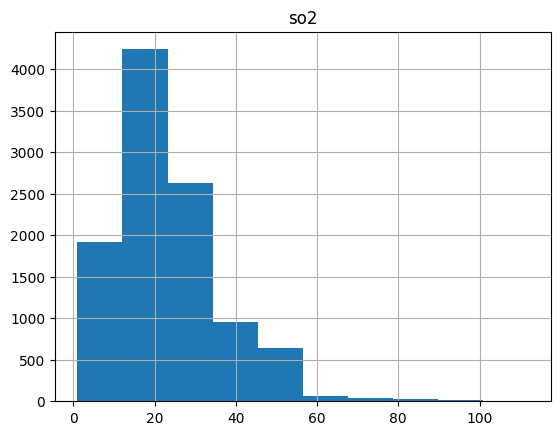

In [ ]:
df.hist('so2')

array([[<Axes: title={'center': 'pm10'}>]], dtype=object)

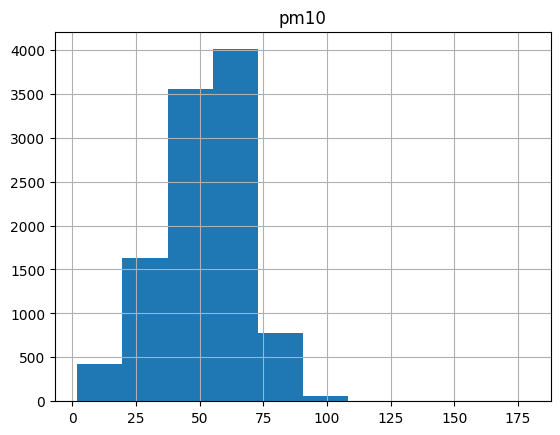

In [ ]:
df.hist('pm10')

array([[<Axes: title={'center': 'co'}>]], dtype=object)

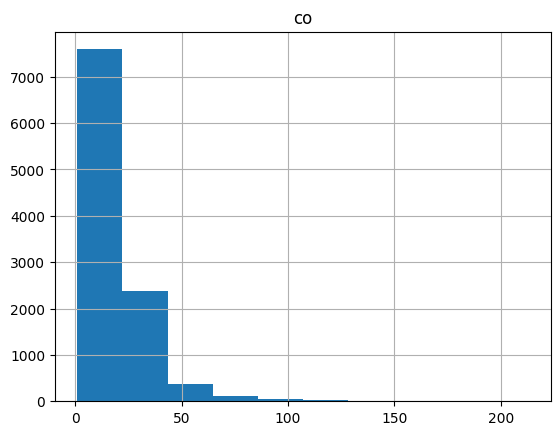

In [ ]:
df.hist('co')

array([[<Axes: title={'center': 'o3'}>]], dtype=object)

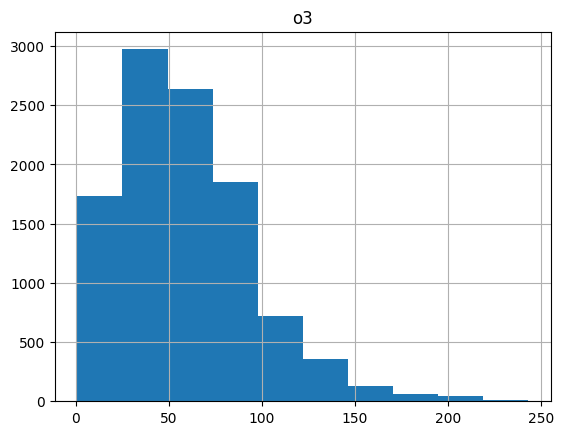

In [ ]:
df.hist('o3')

array([[<Axes: title={'center': 'no2'}>]], dtype=object)

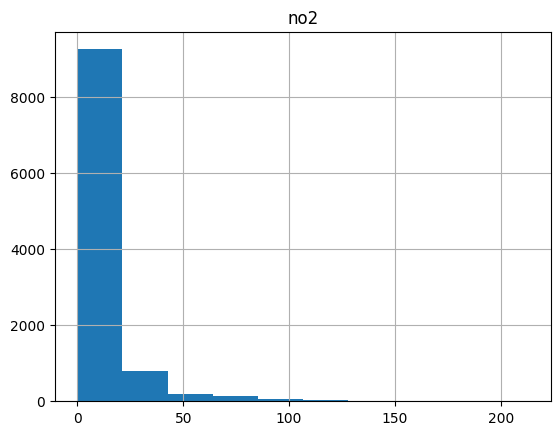

In [ ]:
df.hist('no2')

array([[<Axes: title={'center': 'max'}>]], dtype=object)

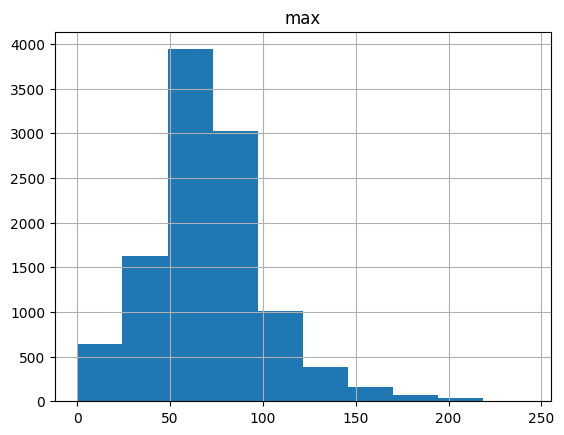

In [ ]:
df.hist('max')

In [ ]:
#mengisi missing value
mean_max = df['max'].mean()
df['max'].fillna(mean_max, inplace= True)

median_no2 = df['no2'].median()
df['no2'].fillna(median_no2,  inplace= True)

mean_o3 = df['o3'].mean()
df['o3'].fillna(mean_o3,  inplace= True)

median_co = df['co'].median()
df['co'].fillna(median_co,  inplace= True)

mean_so2 = df['so2'].mean()
df['so2'].fillna(mean_so2,  inplace= True)

mean_pm10 = df['pm10'].mean()
df['pm10'].fillna(mean_pm10,  inplace= True)

In [ ]:
df.isna().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
Jakarta     0
dtype: int64

## Data for Modeling

In [ ]:
df['stasiun']=df['stasiun'].astype("str")

In [ ]:
#Mengubah stasiun/lokasi dari string ke numerical
def station(stasiun):
    if stasiun == 'DKI1 (Bunderan HI)':
        return 1
    elif stasiun == 'DKI2 (Kelapa Gading)':
        return 2
    elif stasiun == 'DKI3 (Jagakarsa)':
        return 3
    elif stasiun == 'DKI4 (Lubang Buaya)':
        return 4
    elif stasiun == 'DKI5 (Kebon Jeruk)':
        return 5
    elif stasiun == 'DKI5 (Kebon Jeruk) Jakarta Barat':
        return 5
    else:
      return 6

df['stasiun'] = df['stasiun'].apply(station)


In [ ]:
def statiun(stasiun):
  if stasiun == 1:
    return "Jakarta_Pusat"
  elif stasiun == 2:
    return "Jakarta_Utara"
  elif stasiun == 3:
    return "Jakarta_Selatan"
  elif stasiun ==4:
    return "Jakarta Timur"
  elif stasiun == 5:
    return "Jakarta Barat"
  else:
    return "Kepulauan Seribu"

df['Jakarta'] = df['stasiun'].apply(statiun)


In [ ]:
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,Jakarta
0,2016-01-01,1,59.0,19.0,27.0,31.0,1.0,59.0,PM10,SEDANG,Jakarta_Pusat
1,2016-01-02,1,52.0,19.0,16.0,33.0,2.0,52.0,PM10,SEDANG,Jakarta_Pusat
2,2016-01-03,1,44.0,19.0,16.0,36.0,2.0,44.0,PM10,BAIK,Jakarta_Pusat
3,2016-01-04,1,58.0,21.0,16.0,46.0,5.0,58.0,PM10,SEDANG,Jakarta_Pusat
4,2016-01-05,1,70.0,19.0,16.0,41.0,4.0,70.0,PM10,SEDANG,Jakarta_Pusat


In [ ]:
print(set(df['stasiun']))

{1, 2, 3, 4, 5, 6}


In [ ]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 'Jakarta'],
      dtype='object')

In [ ]:
df['categori'].value_counts()

SEDANG                7251
BAIK                  2003
TIDAK SEHAT           1495
SANGAT TIDAK SEHAT      42
Name: categori, dtype: int64

In [ ]:
def udara(kualitas):
  if kualitas == "BAIK":
    return 3
  elif kualitas == "SEDANG":
    return 2
  elif kualitas== "TIDAK SEHAT":
    return 1
  else:
    return 0
df["kualitas_udara"] = df['categori'].apply(udara)

In [ ]:
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,Jakarta,kualitas_udara
0,2016-01-01,1,59.0,19.0,27.0,31.0,1.0,59.0,PM10,SEDANG,Jakarta_Pusat,2
1,2016-01-02,1,52.0,19.0,16.0,33.0,2.0,52.0,PM10,SEDANG,Jakarta_Pusat,2
2,2016-01-03,1,44.0,19.0,16.0,36.0,2.0,44.0,PM10,BAIK,Jakarta_Pusat,3
3,2016-01-04,1,58.0,21.0,16.0,46.0,5.0,58.0,PM10,SEDANG,Jakarta_Pusat,2
4,2016-01-05,1,70.0,19.0,16.0,41.0,4.0,70.0,PM10,SEDANG,Jakarta_Pusat,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10936,2021-01-27,5,15.0,16.0,5.0,20.0,10.0,20.0,CO,BAIK,Jakarta Barat,3
10937,2021-01-28,5,28.0,19.0,11.0,28.0,10.0,28.0,PM10,BAIK,Jakarta Barat,3
10938,2021-01-29,5,30.0,22.0,10.0,32.0,11.0,32.0,CO,BAIK,Jakarta Barat,3
10939,2021-01-30,5,24.0,17.0,8.0,27.0,10.0,27.0,CO,BAIK,Jakarta Barat,3


## ONE HOT ENCODER

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

columns_to_encode = ['Jakarta', 'critical','categori']


encoded_data = encoder.fit_transform(df[columns_to_encode])
df_encoded = pd.DataFrame(encoded_data.toarray())
df_encoded.columns = encoder.get_feature_names_out(columns_to_encode)
df_encoded = pd.concat([df, df_encoded], axis=1)

df_encode=df_encoded.drop(columns_to_encode, axis=1)

# Modeling

## modeling kualitas bagus

## Train Split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10791 entries, 0 to 10940
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tanggal         10791 non-null  object 
 1   stasiun         10791 non-null  int64  
 2   pm10            10791 non-null  float64
 3   so2             10791 non-null  float64
 4   co              10791 non-null  float64
 5   o3              10791 non-null  float64
 6   no2             10791 non-null  float64
 7   max             10791 non-null  float64
 8   critical        10791 non-null  object 
 9   categori        10791 non-null  object 
 10  Jakarta         10791 non-null  object 
 11  kualitas_udara  10791 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
# Spliting training dan testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Evaluasi Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
#input variabel
df_lulus = pd.DataFrame(df)
x = df_lulus.drop(['tanggal','Jakarta','critical','categori','kualitas_udara','stasiun'], axis=1)

#target variabel
y = df_lulus['kualitas_udara'].astype('category')

In [ ]:
# Split testing and training ------- Supervised Learning

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## XGB

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# Membuat objek algoritma XGBOOST Classifier
clf_lulus = XGBClassifier()

# Memodelkan data menggunakan algoritma Decision Tree
model_lulus = clf_lulus.fit(x_train,y_train)

# Melakukan predict pada data test
pred_lulus = model_lulus.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_lulus))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       456
           2       1.00      1.00      1.00      2161
           3       1.00      1.00      1.00       609

    accuracy                           1.00      3238
   macro avg       1.00      1.00      1.00      3238
weighted avg       1.00      1.00      1.00      3238



In [ ]:
df_lulus.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,Jakarta,kualitas_udara
0,2016-01-01,1,59.0,19.0,27.0,31.0,1.0,59.0,PM10,SEDANG,Jakarta_Pusat,2
1,2016-01-02,1,52.0,19.0,16.0,33.0,2.0,52.0,PM10,SEDANG,Jakarta_Pusat,2
2,2016-01-03,1,44.0,19.0,16.0,36.0,2.0,44.0,PM10,BAIK,Jakarta_Pusat,3
3,2016-01-04,1,58.0,21.0,16.0,46.0,5.0,58.0,PM10,SEDANG,Jakarta_Pusat,2
4,2016-01-05,1,70.0,19.0,16.0,41.0,4.0,70.0,PM10,SEDANG,Jakarta_Pusat,2


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

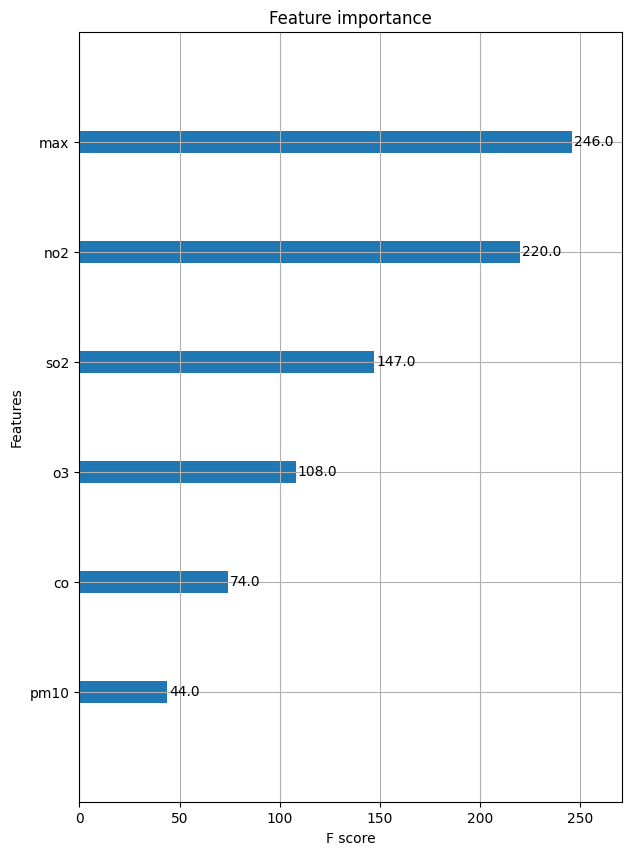

In [ ]:
plt.rcParams["figure.figsize"] = (7, 10)
plot_importance(model_lulus)

In [ ]:
# export as download if in colab
from google.colab import files
df_lulus.to_csv('The Crew.csv')
files.download('The Crew.csv')
print("berhasil the crew dijadikan csv!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

berhasil the crew dijadikan csv!
